#### This script is to compare the chemical potential with thermodynamics tables.

In [11]:
import  math
from math import *
import  pandas as pd
import numpy as np
from numpy import arange
from sympy import *
import matplotlib.pyplot as plt

In [12]:
# Reading the frequencies of S8 ring
#d0=pd.read_csv('freq', sep='\s+',header=0)
convert=29979245800.0*2*pi #cm^-1 to Hz
#w0=d0['x']
#print(np.array(w0))
w0=[2.10968990e-01, 7.42646474e+01, 7.43325628e+01, 1.36225482e+02,
 1.36290076e+02, 1.85771263e+02, 1.85786796e+02, 2.12035325e+02,
 2.28606326e+02, 2.45210844e+02, 2.45241312e+02, 3.56870108e+02,
 3.90002968e+02, 3.90080384e+02, 4.51735833e+02, 4.51793806e+02,
 4.61001272e+02, 4.61044236e+02, 4.70393264e+02]
w0=np.array(w0)*convert
#T=700  #k
p0=1e+06  # 
k=1.380649e-16
h=6.62607015e-27
hbar=1.054571817e-27
sigma=8
pi=3.14159265359
m=3.1941378e-22
IA=IB=1.314051643394595e-37
IC=2.42660958899724e-37
R=8.31446261815324
mu_0=[]

## $A=\ln( \frac{Z^{0}_{trans} kT}{V})=\ln [(\frac{2 \pi m }{ h^{2}})^{\frac{3}{2}}\frac{(kT)^{\frac{5}{2}}}{p_{0}}]= \ln [(2 \pi m )^{\frac{3}{2}}\frac{(kT)^{\frac{5}{2}}}{h^{3} p_{0}}]$

In [13]:
for T in range(300,4100,100):
    #print(T)
    A=np.log((((2*pi*m)**(3/2))*((k*T)**(5/2)))/(p0*(h**3)))
    I=np.sqrt(IA)*np.sqrt(IB)*np.sqrt(IC)
    B=np.log(np.sqrt(pi)/sigma)+ np.log((((8*pi*k*T)/(h**2))**(3/2))*I)
    temp=-np.array([(np.log(1-math.exp(-(hbar*i)/(k*T)))) for i in w0])
    C=np.sum(temp)
    mu_0.append(R*(A+B+C))
    
#print('A= ', A)

##  $B= \ln Z^{0}_{rot}=\ln(\frac{\pi^{\frac{1}{2}}}{\sigma})+ \ln ((\frac{8 \pi kT}{h^{2}})^{\frac{3}{2}}I_{A}^{\frac{1}{2}} I_{B}^{\frac{1}{2}} I_{C}^{\frac{1}{2}})$

In [14]:
    

#print('B= ', B)

## $ C=\ln Z^{0}_{vib}= -\sum^{3N-6}_{i} \ln(1-exp(-\frac{ \hbar \omega_{i}}{kT}))$

In [15]:


#print('C= ', C)

## $  \mu^{0}=R\ln\frac{Z^{0}}{V} \frac{kT}{p_{0}} = R\ln [(\frac{2 \pi m }{ h^{2}})^{\frac{3}{2}}\frac{(kT)^{\frac{5}{2}}}{p_{0}}]+ R \ln(\frac{\pi^{\frac{1}{2}}}{\sigma})+ \\ 
    R \ln ((\frac{8 \pi kT}{h^{2}})^{\frac{3}{2}}I_{A}^{\frac{1}{2}} I_{B}^{\frac{1}{2}} I_{C}^{\frac{1}{2}})-R \sum^{3N-6}_{i} \ln(1-exp(-\beta h \omega_{i})) $

In [16]:

#print('The calculated mu_0 at ', T,  ' k is = ', mu_0, 'J.k-1.mol-1')
mu_0_t=[430.314,436.591,448.745,462.613,476.707,490.450,503.625,516.162,528.059,539.342,550.051,560.227,569.910,579.141,587.954,596.383,604.457,612.203,619.646,626.806,633.705,640.359,646.784,652.996,659.009,664.833,670.480,675.961,681.284,686.459,691.493,696.394,701.169,705.823,710.362,714.793,719.120,723.348]

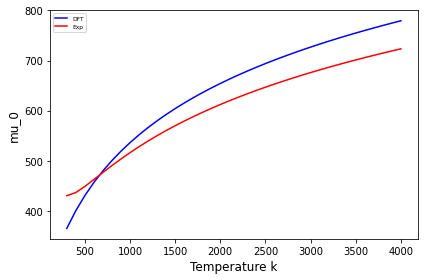

In [17]:
T=arange(300,4100,100)
#deltas=mu_0-mu_0_t
plt.plot(T,mu_0, 'blue', label='DFT') 
plt.plot(T,mu_0_t, 'red', label='Exp') 
#plt.plot(T,mu_0-mu_0_t, 'blue', label='DFT') 

#plt.plot(T, VMo, 'yellow', label='Mono Mo vacany') 
plt.xlabel('Temperature k', fontsize=12)
plt.ylabel('mu_0', fontsize=12)
plt.legend(fontsize=6)
plt.yticks(fontsize=10)
plt.tight_layout()
#
plt.savefig('mu_comparison.pdf')
plt.show()  

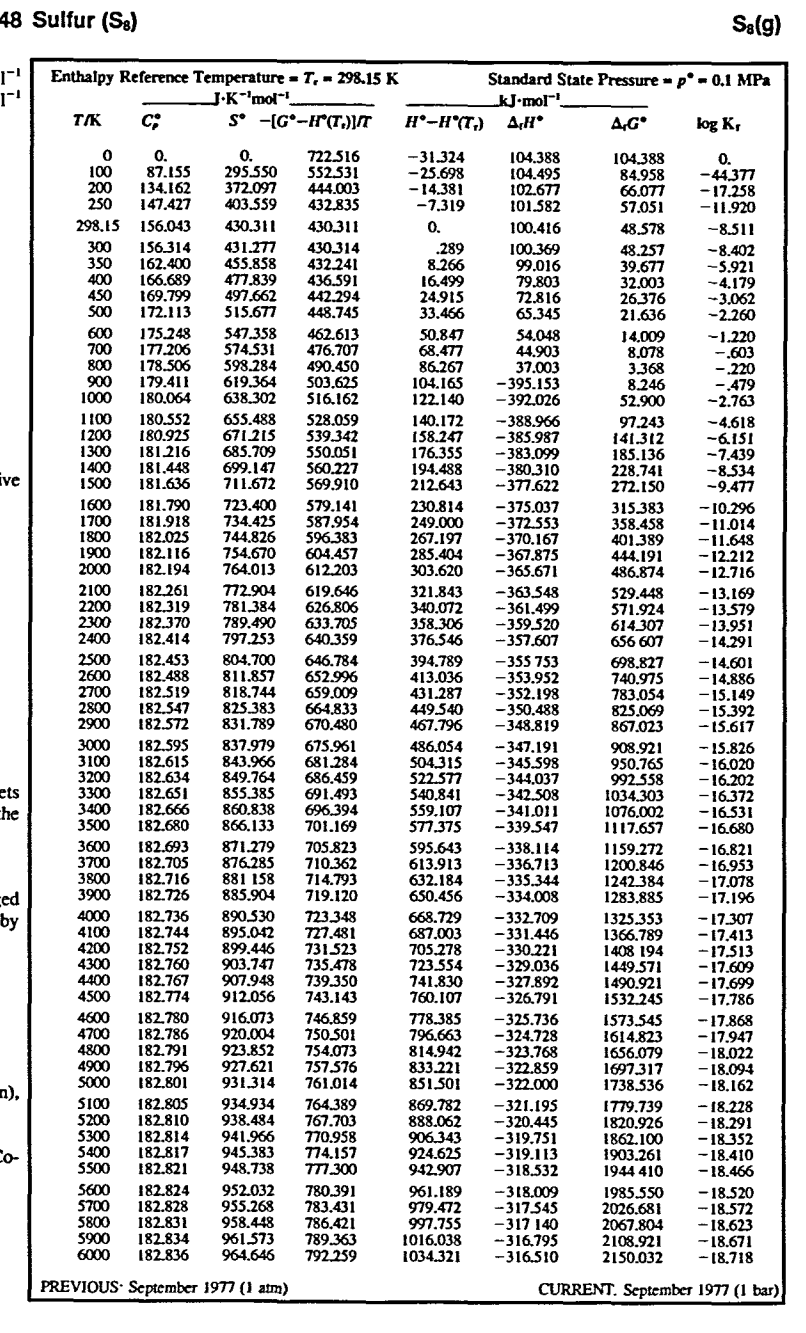

In [18]:
from IPython.display import Image
Image(filename='S8.png',width=800, height=400)

## Now, we calculate the full tempreture and pressure range chemical potential

## $\mu=   \mu_{0}+ kT \ln\frac{p}{p_{0}}+ E_{DFT}+ \sum_{i}\frac{\beta \hbar \omega_{i}}{2}$

In [19]:
#mu_0=-(k*T*mu_0)/R
#E_DFT=-87031.346957 #ev
#E_DFT=1.3944e-07 #erg
#p=p0/4 #At equilibrium, the partial pressure of S8 is 0.25 atm.

In [20]:
#temp=-numpy.array([(math.exp(-(hbar*i)/(2*k*T))) for i in w0])
#D=numpy.sum(temp)
#print('D= ', D)

In [21]:
#mu=mu_0 + k*T*np.log(p/p0)+D + E_DFT #erg
#mu=mu*6.242e+11 #eV

In [22]:
#print('The total chemical potential at constant pressure', p, 'is', mu)